## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 4
## KNN - without buildIn Fnc

In [2]:
import pandas as pd
from math import sqrt
import numpy as np

In [3]:
df=pd.read_csv("../data/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.T.drop_duplicates().T
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
sp = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2,
}
df['Species'] = df['Species'].map(sp)

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [8]:
df = df.astype(int)
df.dtypes

Id               int64
SepalLengthCm    int64
SepalWidthCm     int64
PetalLengthCm    int64
PetalWidthCm     int64
Species          int64
dtype: object

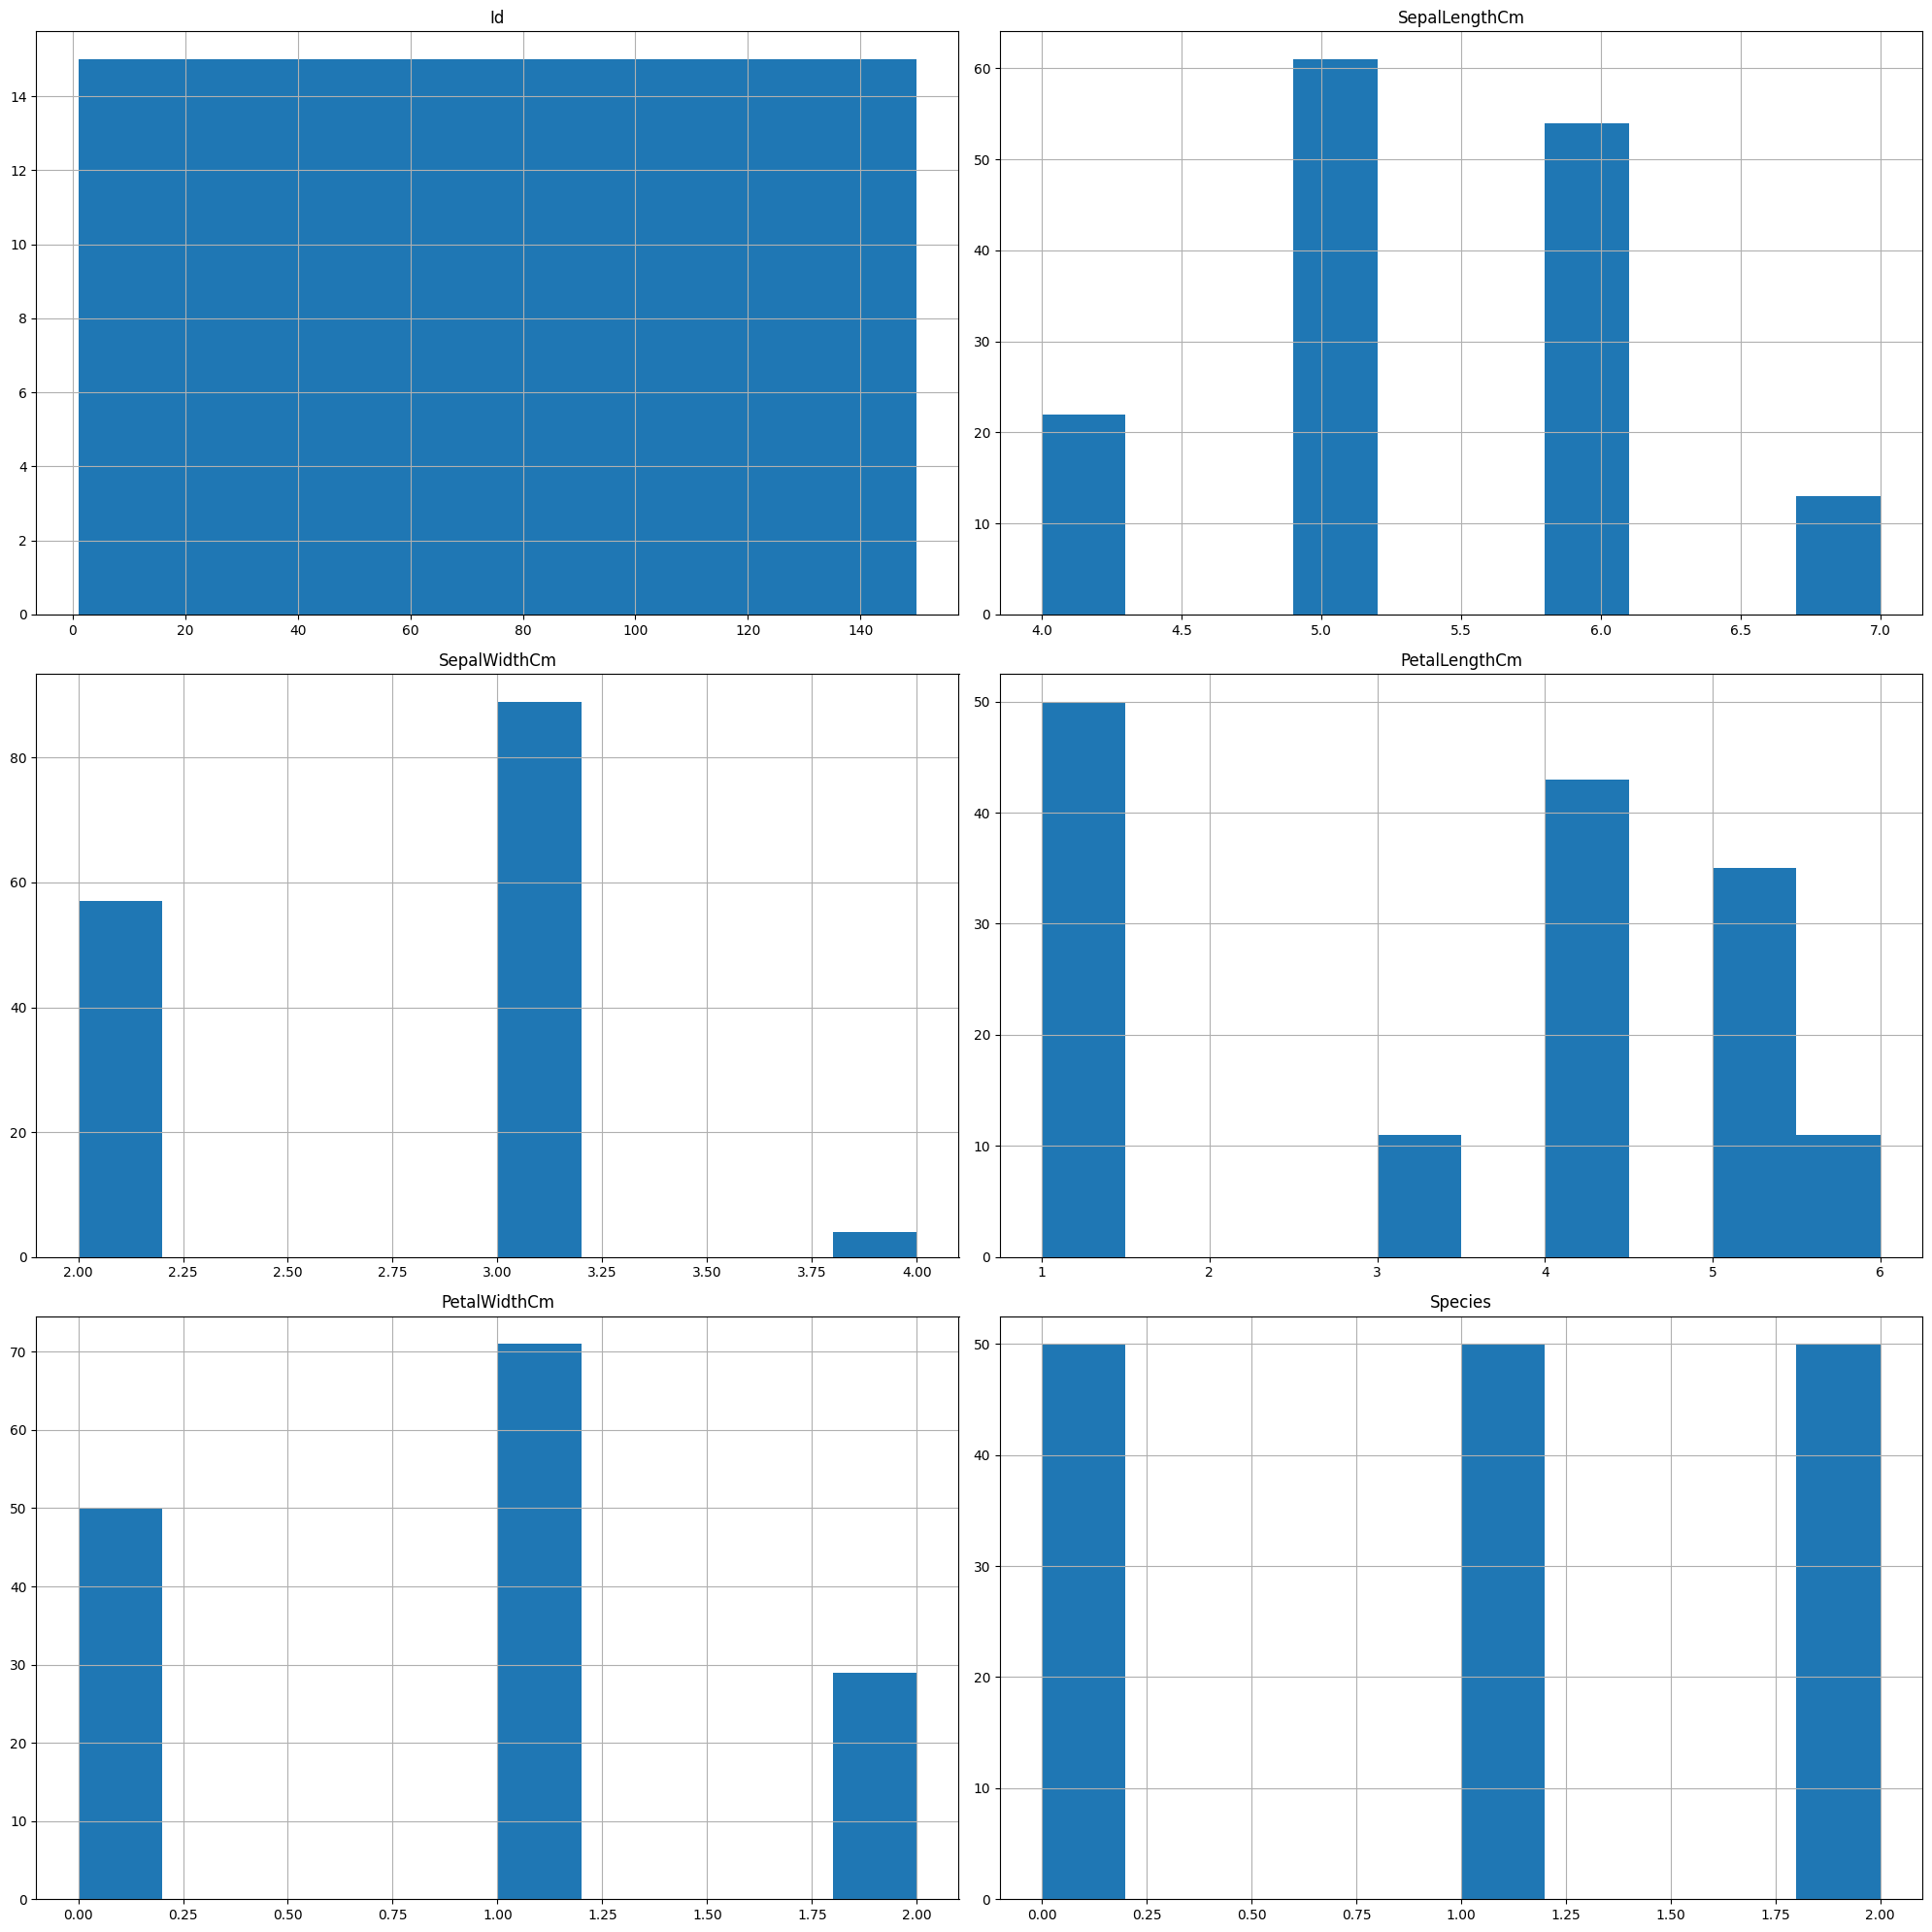

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(20, 20))
plt.tight_layout()  
plt.show()

In [10]:
corr_matrix = df.corr()
print(corr_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.665264     -0.323809       0.888658   
SepalLengthCm  0.665264       1.000000     -0.127335       0.788346   
SepalWidthCm  -0.323809      -0.127335      1.000000      -0.382160   
PetalLengthCm  0.888658       0.788346     -0.382160       1.000000   
PetalWidthCm   0.855021       0.693228     -0.289575       0.908784   
Species        0.942830       0.720202     -0.353748       0.947721   

               PetalWidthCm   Species  
Id                 0.855021  0.942830  
SepalLengthCm      0.693228  0.720202  
SepalWidthCm      -0.289575 -0.353748  
PetalLengthCm      0.908784  0.947721  
PetalWidthCm       1.000000  0.905835  
Species            0.905835  1.000000  


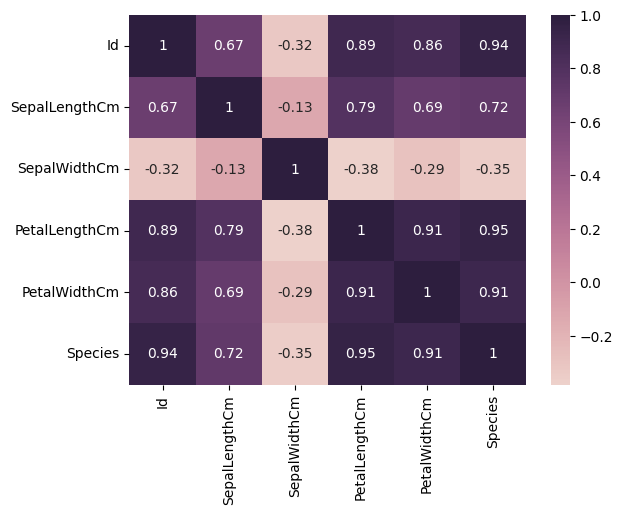

In [11]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [12]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]
y = df['Species']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


In [13]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

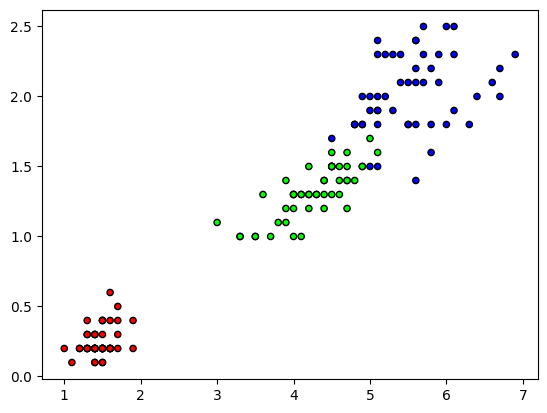

In [14]:
cmap = ListedColormap(['#FF0000','#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap = cmap, edgecolor = 'k', s = 20)
plt.show()

In [15]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [16]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)


[2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2]


In [17]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)


0.9333333333333333
